In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import pandas as pd
from DataLoader.dataloader_IVDSegmengtation import landmark_extractor, read_data
from utils.heatmap_generator import HeatmapGenerator
from utils.processing import crop_center

import cv2
import random
import numpy as np
from scipy import ndimage

In [2]:
landmark_path = '/home/minghao/Desktop/Spine_Segmentation_new_data/Spine_Segmentation/Case2/landmarks_512.csv'
MR_Path = '/home/minghao/Desktop/Spine_Segmentation_new_data/Spine_Segmentation/Case2/MR_512.nii.gz'
Mask = '/home/minghao/Desktop/Spine_Segmentation_new_data/Spine_Segmentation/Case2/Mask_512.nii.gz'

In [3]:
landmark = pd.read_csv(landmark_path)
landmark_out = landmark_extractor(landmark)
landmark_out[10][1]

137

In [4]:
landmark_out[10][2]

236

In [5]:
gen = HeatmapGenerator(image_size=(12,512,512))
heatmap = gen.generate_heatmaps(landmark_out)
heatmap.shape

(19, 12, 512, 512)

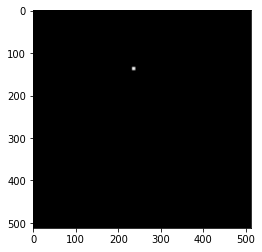

In [6]:
plt.imshow(heatmap[10][6], cmap = 'gray')

In [7]:
image = sitk.ReadImage(MR_Path)
image = sitk.GetArrayFromImage(image)[np.newaxis, :, :, :]
image.shape

(1, 15, 512, 512)

In [8]:
np.isnan(landmark_out[18][0])

True

In [9]:
#plt.imshow(6000*heatmap[10][6]+image[6], cmap='gray')

In [10]:
im_crop_MR = crop_center(image,landmark_out[10],(128,128))
im_crop_MR.shape

(1, 15, 128, 128)

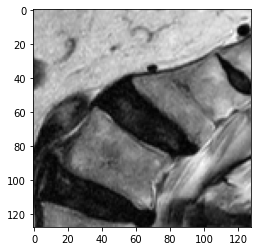

In [11]:
plt.imshow(im_crop_MR[0][6], cmap='gray')

In [12]:
im_crop_hm = crop_center(heatmap,landmark_out[10],(128,128))
im_crop_hm.shape

(19, 12, 128, 128)

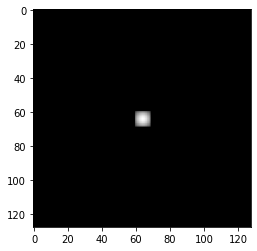

In [13]:
plt.imshow(im_crop_hm[10][6], cmap='gray')


In [14]:
start = random.choice([i for i in range(15 - 12 + 1)])
start


3